# Graph Mining II

# 0. 그래프 리뷰


In [ ]:
!pip install karateclub
!pip install node2vec
!pip install --upgrade networkx==2.8.7
!pip install --upgrade pillow
!pip install matplotlib==3.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached networkx-2.6.3-py3-none-any.whl (1.9 MB)
  Attempting uninstall: networkx
    Found existing installation: networkx 2.8.7
    Uninstalling networkx-2.8.7:
      Successfully uninstalled networkx-2.8.7


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached networkx-2.8.7-py3-none-any.whl (2.0 MB)
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
karateclub 1.3.3 requires networkx<2.7, but you have networkx 2.8.7 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def draw_graph(G, pos_nodes, node_names={}, node_size=50, plot_weight=False):
    nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color='gray', arrowsize=30)

    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)

    nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)


    if plot_weight:
        pos_attrs = {}
        for node, coords in pos_nodes.items():
            pos_attrs[node] = (coords[0], coords[1] + 0.08)

        nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)
        edge_labels=dict([((a,b,),d["weight"]) for a,b,d in G.edges(data=True)])
        nx.draw_networkx_edge_labels(G, pos_nodes, edge_labels=edge_labels)

    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])

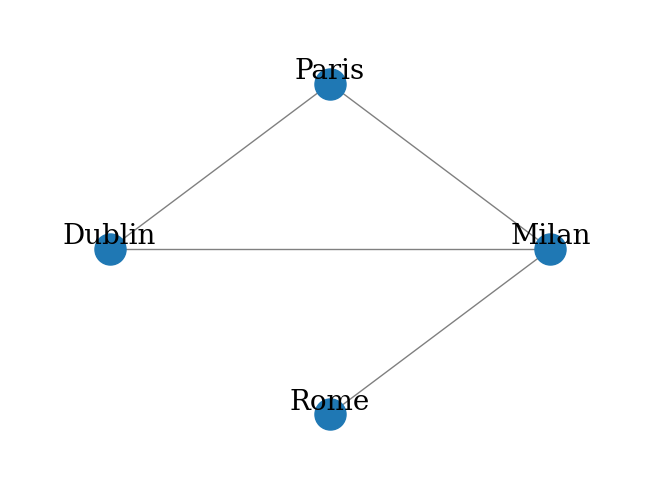

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan','Dublin'), ('Milan','Paris'), ('Paris','Dublin'), ('Milan','Rome')]
G.add_nodes_from(V)
G.add_edges_from(E)
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)

In [ ]:
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Dublin', 'Rome', 'Milan', 'Paris']
E = [('Dublin', 'Milan'), ('Dublin', 'Paris'), ('Rome', 'Milan'), ('Milan', 'Paris')]


In [ ]:
{G.degree(v): v for v in G.nodes}

{2: 'Paris', 1: 'Rome', 3: 'Milan'}

In [ ]:
print(f"Graph Order: {G.number_of_nodes()}")
print(f"Graph Size: {G.number_of_edges()}")
print(f"Degree for nodes: { {v: G.degree(v) for v in G.nodes} }")
print(f"Neighbors for nodes: { {v: list(G.neighbors(v)) for v in G.nodes} }")

Graph Order: 4
Graph Size: 4
Degree for nodes: {'Dublin': 2, 'Rome': 1, 'Milan': 3, 'Paris': 2}
Neighbors for nodes: {'Dublin': ['Milan', 'Paris'], 'Rome': ['Milan'], 'Milan': ['Dublin', 'Paris', 'Rome'], 'Paris': ['Milan', 'Dublin']}


In [ ]:
ego_graph_milan = nx.ego_graph(G, "Milan")
print(f"Nodes: {ego_graph_milan.nodes}")
print(f"Edges: {ego_graph_milan.edges}")

Nodes: ['Dublin', 'Rome', 'Milan', 'Paris']
Edges: [('Dublin', 'Milan'), ('Dublin', 'Paris'), ('Rome', 'Milan'), ('Milan', 'Paris')]


In [ ]:
new_nodes = {'London', 'Madrid'}
new_edges = [('London','Rome'), ('Madrid','Paris')]
G.add_nodes_from(new_nodes)
G.add_edges_from(new_edges)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Dublin', 'Rome', 'Milan', 'Paris', 'Madrid', 'London']
E = [('Dublin', 'Milan'), ('Dublin', 'Paris'), ('Rome', 'Milan'), ('Rome', 'London'), ('Milan', 'Paris'), ('Paris', 'Madrid')]


In [ ]:
node_remove = {'London', 'Madrid'}
G.remove_nodes_from(node_remove)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Dublin', 'Rome', 'Milan', 'Paris']
E = [('Dublin', 'Milan'), ('Dublin', 'Paris'), ('Rome', 'Milan'), ('Milan', 'Paris')]


In [ ]:
node_edges = [('Milan','Dublin'), ('Milan','Paris')]
G.remove_edges_from(node_edges)
print(f"V = {G.nodes}")
print(f"E = {G.edges}")

V = ['Dublin', 'Rome', 'Milan', 'Paris']
E = [('Dublin', 'Paris'), ('Rome', 'Milan')]


In [ ]:
print(nx.to_edgelist(G))

[('Dublin', 'Paris', {}), ('Rome', 'Milan', {})]


In [ ]:
print(nx.to_pandas_adjacency(G))

        Dublin  Rome  Milan  Paris
Dublin     0.0   0.0    0.0    1.0
Rome       0.0   0.0    1.0    0.0
Milan      0.0   1.0    0.0    0.0
Paris      1.0   0.0    0.0    0.0


- Directed Graph

In [ ]:
import networkx as nx
G = nx.DiGraph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan','Dublin'), ('Paris','Milan'), ('Paris','Dublin'), ('Milan','Rome')]
G.add_nodes_from(V)
G.add_edges_from(E)
print(nx.to_pandas_edgelist(G))
print(nx.to_pandas_adjacency(G))

  source  target
0  Milan  Dublin
1  Milan    Rome
2  Paris   Milan
3  Paris  Dublin
        Dublin  Rome  Milan  Paris
Dublin     0.0   0.0    0.0    0.0
Rome       0.0   0.0    0.0    0.0
Milan      1.0   1.0    0.0    0.0
Paris      1.0   0.0    1.0    0.0


In [ ]:

print(f"Indegree for nodes: { {v: G.in_degree(v) for v in G.nodes} }")
print(f"Outegree for nodes: { {v: G.out_degree(v) for v in G.nodes} }")

Indegree for nodes: {'Dublin': 2, 'Rome': 1, 'Milan': 1, 'Paris': 0}
Outegree for nodes: {'Dublin': 0, 'Rome': 0, 'Milan': 2, 'Paris': 2}


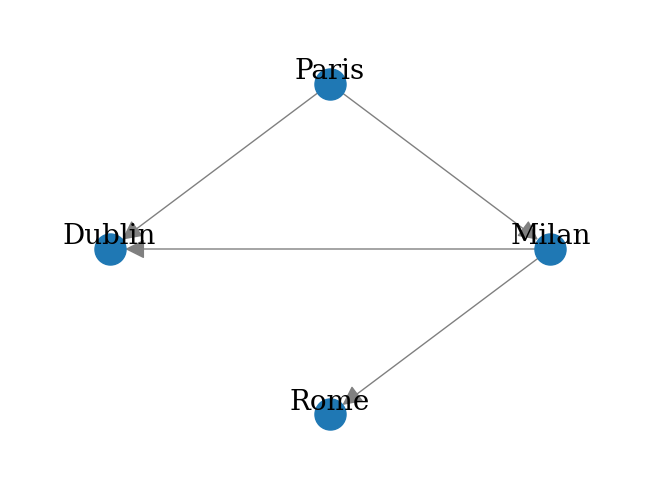

In [ ]:
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)

- Weighted Directed Graph

  source  target  weight
0  Milan    Rome       5
1  Milan  Dublin      19
2  Paris  Dublin      11
3  Paris   Milan       8
        Dublin  Rome  Milan  Paris
Dublin     0.0   0.0    0.0    0.0
Rome       0.0   0.0    0.0    0.0
Milan     19.0   5.0    0.0    0.0
Paris     11.0   0.0    8.0    0.0


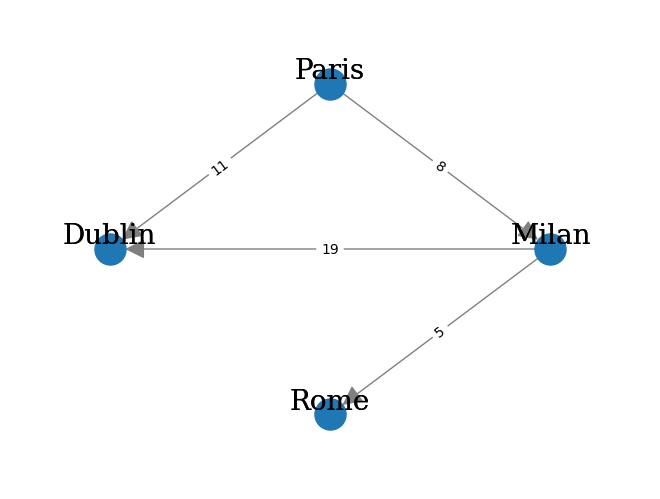

In [ ]:
import networkx as nx
G = nx.MultiDiGraph()
V = {'Paris', 'Dublin','Milan', 'Rome'}
E = [ ('Paris','Dublin', 11), ('Paris','Milan', 8),
     ('Milan','Rome', 5),('Milan','Dublin', 19)]
G.add_nodes_from(V)
G.add_weighted_edges_from(E)
draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500, plot_weight=True)
print(nx.to_pandas_edgelist(G))
print(nx.to_pandas_adjacency(G))

- Bipartite Graph

In [ ]:
n_nodes = 10
n_edges = 12
bottom_nodes = [ith for ith in range(n_nodes) if ith % 2 ==0]
top_nodes = [ith for ith in range(n_nodes) if ith % 2 ==1]
iter_edges = zip(
    np.random.choice(bottom_nodes, n_edges),
    np.random.choice(top_nodes, n_edges))
edges = pd.DataFrame([
    {"source": a, "target": b} for a, b in iter_edges])
B = nx.Graph()
B.add_nodes_from(bottom_nodes, bipartite=0)
B.add_nodes_from(top_nodes, bipartite=1)
B.add_edges_from([tuple(x) for x in edges.values])

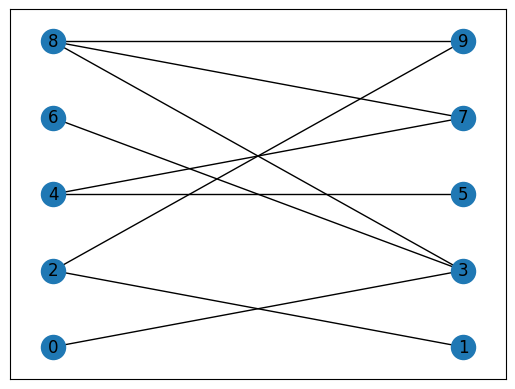

In [ ]:
from networkx.drawing.layout import bipartite_layout
pos = bipartite_layout(B, bottom_nodes)
nx.draw_networkx(B, pos=pos)

- Multi Graph

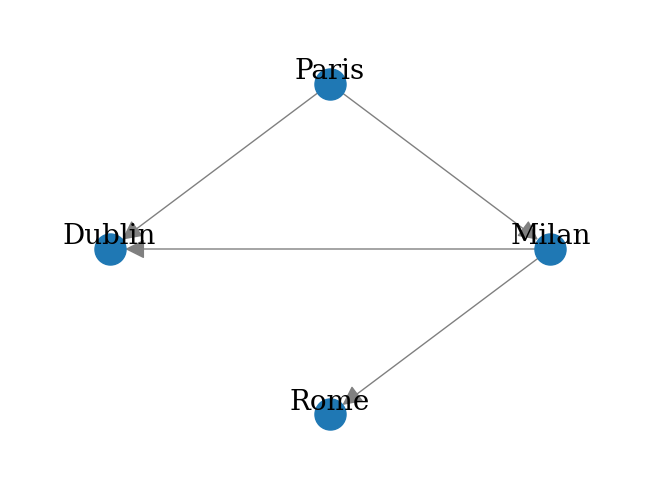

In [ ]:
import networkx as nx
directed_multi_graph = nx.MultiDiGraph()
V = {'Dublin', 'Paris', 'Milan', 'Rome'}
E = [('Milan','Dublin'), ('Milan','Dublin'), ('Paris','Milan'), ('Paris','Dublin'), ('Milan','Rome'), ('Milan','Rome')]
directed_multi_graph.add_nodes_from(V)
directed_multi_graph.add_edges_from(E)

draw_graph(G, pos_nodes=nx.shell_layout(G), node_size=500)

In [ ]:
import networkx as nx
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

default_edge_color = 'gray'
default_node_color = '#407cc9'
enhanced_node_color = '#f5b042'
enhanced_edge_color = '#cc2f04'

- 주요 측정 지표들
 - Integration metrics: 노드의 상호 연결 경향 측정
 - segregation metrics: 그래프 내 커뮤니티, 또는 모듈로 분리되는 그룹을 탐지
 - centrality metrics: 개별 노드이 중요성
 - resilience metrics: 그래프가 장애나 특정 이벤트 발생 시 운영 성능을 잘 유지할 수 있는지에 대한 측정

- 그 외에도 networkx의 algoritms에 가서 더 많은 지표를 확인
- https://networkx.org/documentation/stable/reference/algorithms


In [ ]:
# draw a simple graph
def draw_graph(G, node_names={}, filename=None, node_size=50):
    pos_nodes = nx.spring_layout(G)
    nx.draw(G, pos_nodes, with_labels=False, node_size=node_size, edge_color='gray')

    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)

    nx.draw_networkx_labels(G, pos_attrs, labels=node_names, font_family='serif')

    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])

    if filename:
        plt.savefig(filename, format="png")


# draw enhanced path on the graph
def draw_enhanced_path(G, path_to_enhance, node_names={}, filename=None):
    path_edges = list(zip(path,path[1:]))
    pos_nodes = nx.spring_layout(G)

    plt.figure(figsize=(5,5),dpi=300)
    pos_nodes = nx.spring_layout(G)
    nx.draw(G, pos_nodes, with_labels=False, node_size=50, edge_color='gray')

    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)

    nx.draw_networkx_labels(G, pos_attrs, labels=node_names, font_family='serif')
    nx.draw_networkx_edges(G,pos_nodes,edgelist=path_edges, edge_color='#cc2f04', style='dashed', width=2.0)

    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])

    if filename:
        plt.savefig(filename, format="png")

### Shortest path

In [ ]:
G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])

In [ ]:
path = nx.shortest_path(G,source=1,target=7)
print(path)

[1, 3, 4, 5, 7]


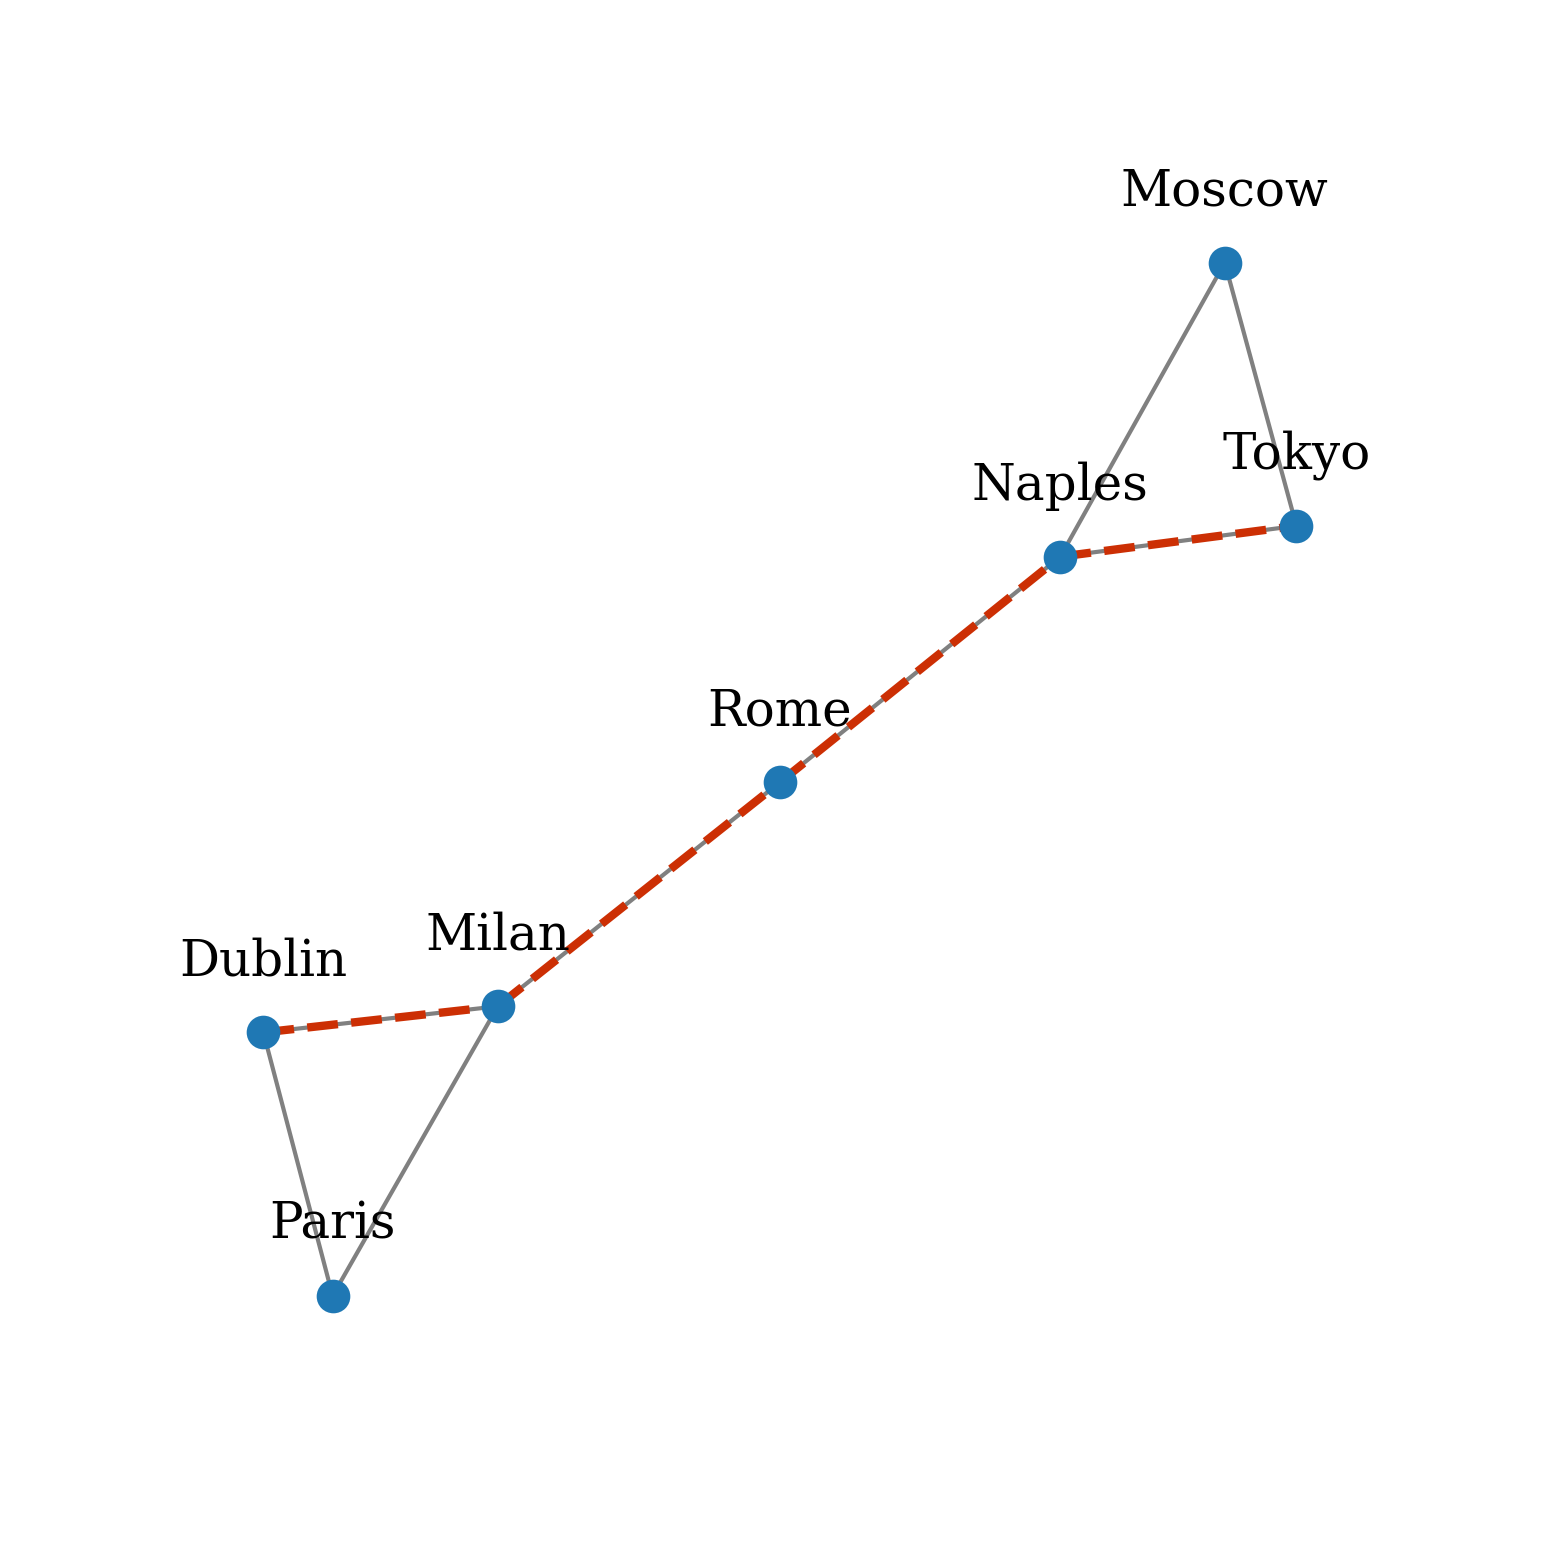

In [ ]:
draw_enhanced_path(G, path, node_names=nodes,filename='shortest_path.png')

### Characteristic path length

In [ ]:
nx.average_shortest_path_length(G)

2.1904761904761907

- Efficiency
 -특성 경로 길이(Chractetistic Path Length): 가능한 모든 노드 쌍 사이의 모든 최단경로 길이의 평균, 단 노드 연결이 끊긴 지점이 있을 경우 계산되지 않아서 Efficiency를 사용
 - Global Efficiency: 모든 노드 쌍에 대한 역최단경로 길이의 평균, 정보가 얼마나 효율적으로 교환되는지를 측정, 노드 간 연결이 끊어진 경우 효율성이 낮아짐, 노드의 근방만 고려해 계산

In [ ]:
G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])

print(nx.global_efficiency(G))
print(nx.local_efficiency(G))

0.611111111111111
0.6666666666666667


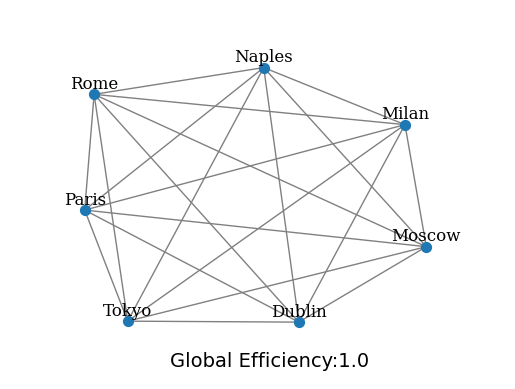

In [ ]:
# higher efficiency
G = nx.complete_graph(n=7)
nodes = {0:'Dublin',1:'Paris',2:'Milan',3:'Rome',4:'Naples',5:'Moscow',6:'Tokyo'}

ge = round(nx.global_efficiency(G),2)

# place the text box in axes coords
ax = plt.gca()
ax.text(-.4, -1.3, "Global Efficiency:{}".format(ge), fontsize=14, ha='left', va='bottom');

draw_graph(G,node_names=nodes,filename='efficiency.png')

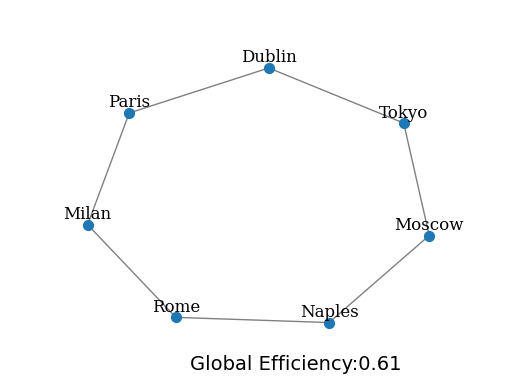

In [ ]:
# lower efficiency
G = nx.cycle_graph(n=7)
nodes = {0:'Dublin',1:'Paris',2:'Milan',3:'Rome',4:'Naples',5:'Moscow',6:'Tokyo'}

le = round(nx.global_efficiency(G),2)

# place the text box in axes coords
ax = plt.gca()
ax.text(-.4, -1.3, "Global Efficiency:{}".format(le), fontsize=14, ha='left', va='bottom');

draw_graph(G, node_names=nodes,filename='less_efficiency.png')

- Clustering coefficient
 - segregation에 대한 측정
 - 군집계수: 얼마나 많은 노드가 함께 군집되는지를 측정

In [ ]:
G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])

In [ ]:
nx.average_clustering(G)

0.6666666666666667

In [ ]:
nx.clustering(G)

{1: 1.0,
 2: 1.0,
 3: 0.3333333333333333,
 4: 0,
 5: 0.3333333333333333,
 6: 1.0,
 7: 1.0}

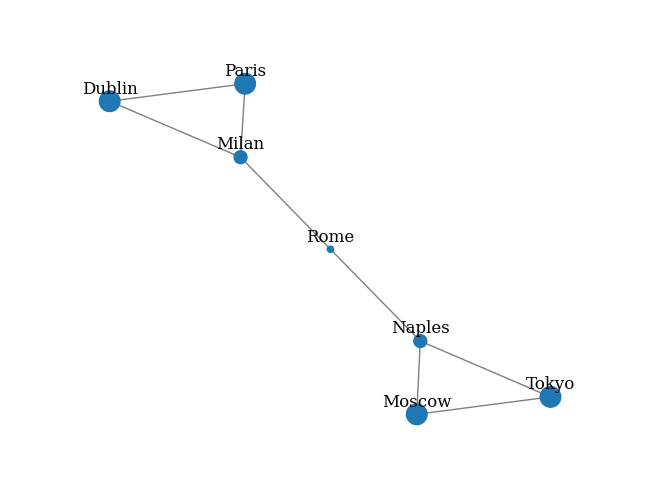

In [ ]:
cc = nx.clustering(G)
node_size=[(v + 0.1) * 200 for v in cc.values()]
draw_graph(G, node_names=nodes, node_size=node_size,filename='clustering.png')

- Centrality

In [ ]:
G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])

In [ ]:
nx.degree_centrality(G)

{1: 0.3333333333333333,
 2: 0.3333333333333333,
 3: 0.5,
 4: 0.3333333333333333,
 5: 0.5,
 6: 0.3333333333333333,
 7: 0.3333333333333333}

,Dublin,Paris,Milan,Rome,Naples,Moscow,Tokyo
Degree centrality,0.333333,0.333333,0.5,0.333333,0.5,0.333333,0.333333


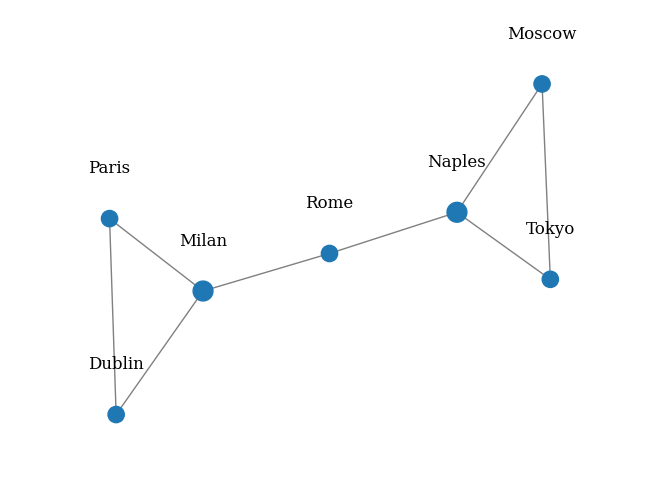

In [ ]:
dc = nx.degree_centrality(G)
node_size=[(v + 0.01) * 400 for v in dc.values()]
draw_graph(G, node_names=nodes, node_size=node_size,filename='deg_centr.png')

df = pd.DataFrame(dc,index=['Degree centrality'])
df.columns = nodes.values()
df

In [ ]:
nx.closeness_centrality(G)

{1: 0.4,
 2: 0.4,
 3: 0.5454545454545454,
 4: 0.6,
 5: 0.5454545454545454,
 6: 0.4,
 7: 0.4}

,Dublin,Paris,Milan,Rome,Naples,Moscow,Tokyo
Closeness centrality,0.4,0.4,0.545455,0.6,0.545455,0.4,0.4


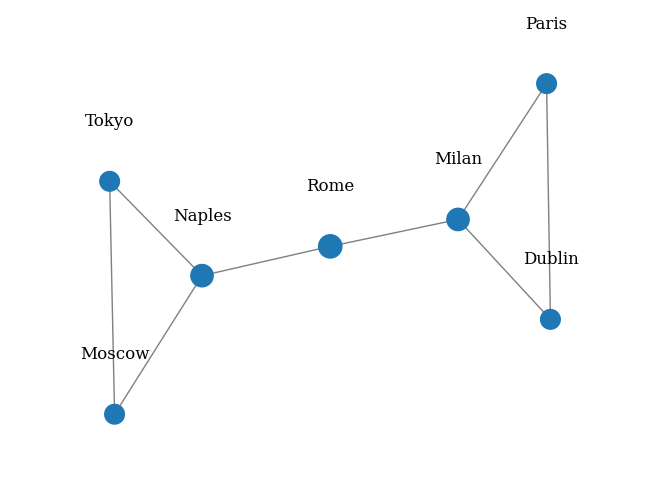

In [ ]:
dc = nx.closeness_centrality(G)
node_size=[(v + 0.1) * 400 for v in dc.values()]
draw_graph(G, node_names=nodes, node_size=node_size,filename='clos_centr.png')

df = pd.DataFrame(dc,index=['Closeness centrality'])
df.columns = nodes.values()
df

In [ ]:
nx.betweenness_centrality(G)

{1: 0.0,
 2: 0.0,
 3: 0.5333333333333333,
 4: 0.6,
 5: 0.5333333333333333,
 6: 0.0,
 7: 0.0}

,Dublin,Paris,Milan,Rome,Naples,Moscow,Tokyo
Betweenness centrality,0.0,0.0,0.533333,0.6,0.533333,0.0,0.0


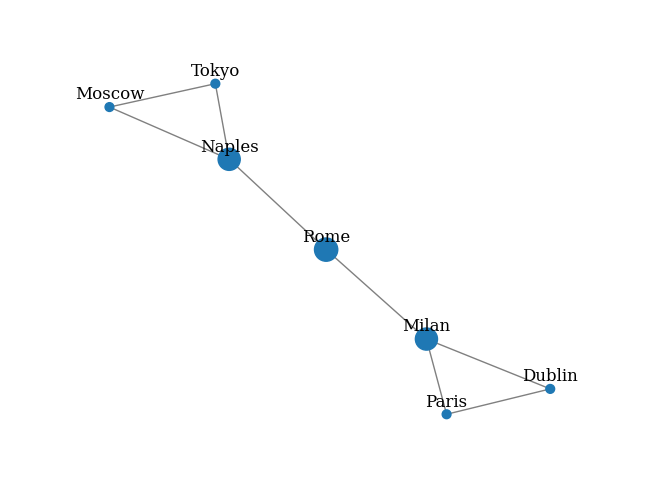

In [ ]:
dc = nx.betweenness_centrality(G)
node_size=[(v + 0.1) * 400 for v in dc.values()]
draw_graph(G, node_names=nodes, node_size=node_size,filename='bet_centrality.png')

df = pd.DataFrame(dc,index=['Betweenness centrality'])
df.columns = nodes.values()
df

- Assortativity
 - 노드가 비슷한 노드에 연결되는 경향을 측정
 - 피어슨 상관계수를 사용: 직접 연결된 노드 차수 간의 피어슨 상관계수
 - 비슷한 차수를 갖는 노드 사이에 상관관계가 있을 경우 양의 상관계수, 다른 차수의 노드 사이에 상관관계가 있는 경우 음의 상관계수

In [ ]:
nx.degree_pearson_correlation_coefficient(G)

-0.6

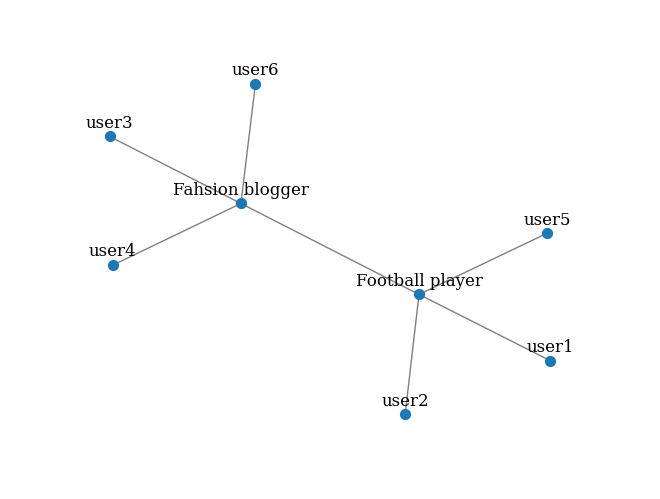

In [ ]:
G = nx.Graph()
nodes = {1:'user1', 2:'user2', 3:'Football player', 4:'Fahsion blogger', 5:'user3', 6:'user4',
         7:'user5', 8:'user6'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,3),(2,3),(7,3),(3,4),(5,4),(6,4),(8,4)])

draw_graph(G, node_names=nodes,filename='assortativity.png')

In [ ]:
nx.degree_pearson_correlation_coefficient(G)

-0.7500000000000001

- Modularity
 - 그래프에서 모듈화가 잘 된경우, 밀집된 연결을 보여줄 수 있음

In [ ]:
import networkx.algorithms.community as nx_comm

G = nx.Graph()
nodes = {1:'Dublin',2:'Paris',3:'Milan',4:'Rome',5:'Naples',6:'Moscow',7:'Tokyo'}
G.add_nodes_from(nodes.keys())
G.add_edges_from([(1,2),(1,3),(2,3),(3,4),(4,5),(5,6),(6,7),(7,5)])

# partitions can be provided manually
print(nx_comm.modularity(G, communities=[{1,2,3,4},{5,6,7}]))

# or automatically computed using networkx
print(nx_comm.modularity(G, nx_comm.label_propagation_communities(G)))

0.3671875
0.3671875


- Transitivity
 - closed triplet의 개수를 중심으로 계산
 - 가능한 closed triplet 대비 현재의 closed triplet이 비

In [ ]:
nx.transitivity(G)

0.5454545454545454

In [ ]:
#cora.cites를 읽어서 그래프를 만든다.
#해당 그래프에 대해서 efficiency
# hope 임베딩
#노드개수 x 임베딩개수에 대한 수치
#노드의 subject값을 데이터 프레임에 연결
#데이터프레임의 행은 노드,컬럼은 임베딩들, subject가 되도록
#45분까지
import networkx as nx

cites = pd.read_csv("cora.cites", sep='\t', header=None, names=["target", "source"])
ci_G = nx.from_pandas_edgelist(cites)
ci_G = nx.to_directed(ci_G)

#ge = nx.global_efficiency(ci_G)
#le = nx.local_efficiency(ci_G)
#print(ge)
#print(le)

content = pd.read_csv("cora.content", sep='\t', header=None)
content = content.iloc[:, [0, 1434]]
content.columns = ["id","subject"]

from gem.embedding.hope import HOPE
content_gh = HOPE(d=4, beta = 0.01)
content_gh.learn_embedding(content)
embeddings = content_gh.get_embedding()


ValueError: ignored

#1. 얕은 임베딩
- 행렬 분해를 이용
- 그래프 분해(Graph Factorization), 고차 근접 보존 임베딩(HOPE, Higher Order Proximity Preserved Embedding) 등을 사용

##1) 그래프 분해

 - 그래프의 인접행렬을 분해
 - 인접행렬이 대칭인 undirected graph에 적합


In [ ]:
!pip install git+https://github.com/palash1992/GEM.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/palash1992/GEM.git to /tmp/pip-req-build-6958l2y4
  Running command git clone --filter=blob:none --quiet https://github.com/palash1992/GEM.git /tmp/pip-req-build-6958l2y4
  Resolved https://github.com/palash1992/GEM.git to commit ae8e92d34213f5785757b4a0943bd7d8d337adb3
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 26.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nxt-gem: filename=nxt_gem-2.0.1-py3-none-any.whl size=25354 sha256=cd605e3fbb1b21369663a10f57f7390c78a7989a199fc244e526ba6f8dc865c3
  Stored in directory: /tmp/pip-ephem-wheel-cache-5qf7jcky/wheels/af/83/c3/fdf95e24a90730b55116c2aaf1a23ebec630b6ec8f4a763d5f
  Created wheel for theano: filename=Theano-1.0.5-py3-none-any.whl size=2668109 sha256=d6038358d7adbb1ff24627bd0dde2d166512895af9a97b73d75ee093ff61b765
  Stored i

In [ ]:
!pip install karateclub
!pip install node2vec
!pip install --upgrade networkx==2.8.7
!pip install --upgrade pillow
!pip install matplotlib==3.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached networkx-2.6.3-py3-none-any.whl (1.9 MB)
  Attempting uninstall: networkx
    Found existing installation: networkx 2.8.7
    Uninstalling networkx-2.8.7:
      Successfully uninstalled networkx-2.8.7


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached networkx-2.8.7-py3-none-any.whl (2.0 MB)
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
karateclub 1.3.3 requires networkx<2.7, but you have networkx 2.8.7 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import networkx as nx
from gem.embedding.gf import GraphFactorization

In [ ]:
G = nx.barbell_graph( m1=10, m2=4)
gf = GraphFactorization(d=2, data_set=None, max_iter=10000, eta = 1*10**-4, regu=1.0)
gf.learn_embedding(G)

./gf not found. Reverting to Python implementation. Please compile gf, place node2vec in the path and grant executable permission


array([[-0.00601871,  0.00282282],
       [-0.00601868,  0.00282599],
       [-0.00602412,  0.00282033],
       [-0.00602188,  0.0028275 ],
       [-0.00600053,  0.00284598],
       [-0.00607408,  0.00277664],
       [-0.00623848,  0.00264682],
       [-0.00605379,  0.00326061],
       [-0.00425254,  0.00354657],
       [-0.00806598,  0.00139682],
       [-0.00883671,  0.00014672],
       [-0.01173779,  0.00505824],
       [-0.01039006,  0.00299878],
       [-0.00679483, -0.00308399],
       [ 0.0033881 ,  0.00322055],
       [ 0.00338817,  0.00322321],
       [ 0.00339107,  0.00322324],
       [ 0.00338379,  0.00321337],
       [ 0.00339572,  0.00320947],
       [ 0.00352056,  0.00317625],
       [ 0.00314703,  0.00322725],
       [ 0.00329876,  0.00259724],
       [ 0.00359582,  0.00238787],
       [ 0.00568099,  0.01311564]])

In [ ]:
embeddings = gf.get_embedding()

## 2) 고차근접보존임베딩

- 행렬 분해 원리 사용
- undirected의 조건이 필요하지 않음

- 고차 근접성을 유지

 - 1차 근접: first order proximity, 두 노드의 직접적인 연결, 그외의 경우 1차 근접도는 0
 - 2차 및 그 이상의 고차 근접: 2단계를 통해 연결되는 관계 혹은 그 이상을 파악, 특정 노드에서 다른 노드로 2단계 이상으로 연결되는 것을 의미
 - 최종 임베딩의 차원: 2*d 차원( 2: source, target의 차원)

In [ ]:
from gem.embedding.hope import HOPE
G = nx.barbell_graph(m1=10, m2 = 4)
gh = HOPE(d=4, beta = 0.01)
gf.learn_embedding(G)
embeddings = gf.get_embedding()


./gf not found. Reverting to Python implementation. Please compile gf, place node2vec in the path and grant executable permission


In [ ]:
embeddings

array([[-0.0041215 ,  0.00086235],
       [-0.00412222,  0.00086364],
       [-0.00412294,  0.00086414],
       [-0.00411728,  0.00086707],
       [-0.00413044,  0.00087841],
       [-0.00411148,  0.00087911],
       [-0.00412457,  0.00057839],
       [-0.00330038,  0.00156323],
       [-0.00619557,  0.00205324],
       [-0.01024305, -0.0078247 ],
       [-0.0147916 , -0.01206599],
       [-0.00364263, -0.00828614],
       [ 0.00782709, -0.00577558],
       [ 0.00694932,  0.00227461],
       [-0.00778884,  0.00856103],
       [-0.00778987,  0.00856136],
       [-0.00778818,  0.00856015],
       [-0.00779628,  0.00857591],
       [-0.00780064,  0.00856815],
       [-0.00778998,  0.00839589],
       [-0.00740447,  0.00868638],
       [-0.00820216,  0.00908429],
       [-0.00787178,  0.0082534 ],
       [-0.0124074 ,  0.01235664]])

In [ ]:
import matplotlib.pyplot as plt

def draw_graph(G, node_names={}, node_size=500):
    pos_nodes = nx.spring_layout(G)
    nx.draw_networkx(G, pos_nodes, with_labels=True, node_size=node_size, edge_color='gray', arrowsize=30)

    pos_attrs = {}
    for node, coords in pos_nodes.items():
        pos_attrs[node] = (coords[0], coords[1] + 0.08)

    #nx.draw_networkx_labels(G, pos_attrs, font_family='serif', font_size=20)

    plt.axis('off')
    axis = plt.gca()
    axis.set_xlim([1.2*x for x in axis.get_xlim()])
    axis.set_ylim([1.2*y for y in axis.get_ylim()])
    plt.show()

## 3) 다양한 임베딩 방법 비교
### Graph Factorization

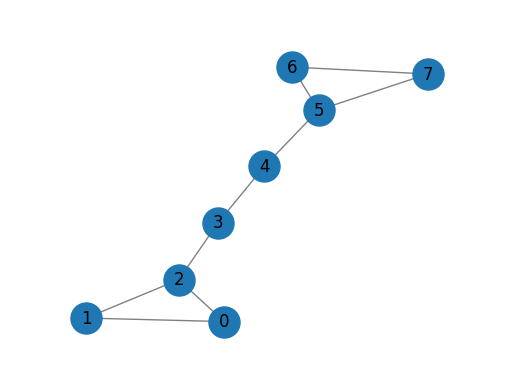

In [ ]:
import networkx as nx

G = nx.barbell_graph(m1=3, m2=2)
draw_graph(G)


In [ ]:
from pathlib import Path
Path("gem/intermediate").mkdir(parents=True, exist_ok=True)

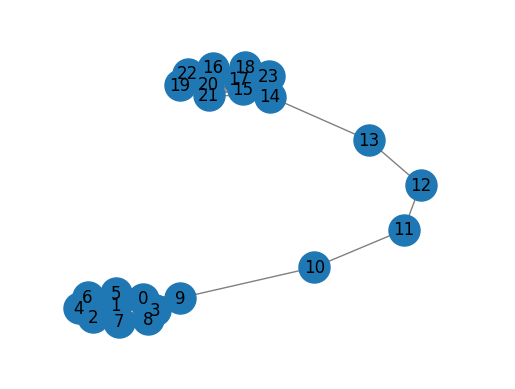

./gf not found. Reverting to Python implementation. Please compile gf, place node2vec in the path and grant executable permission


array([[-0.00337145,  0.00897748],
       [-0.00337149,  0.00897756],
       [-0.00337368,  0.0089793 ],
       [-0.00335549,  0.00897628],
       [-0.00339924,  0.00894351],
       [-0.00344221,  0.00895841],
       [-0.00317978,  0.00922612],
       [-0.00241295,  0.00938587],
       [-0.00536905,  0.00905133],
       [-0.00536327,  0.01163768],
       [-0.00400893,  0.00666434],
       [-0.00414893, -0.00086765],
       [-0.00317222, -0.00067079],
       [-0.00401422,  0.00362499],
       [-0.00607737,  0.00786597],
       [-0.00607747,  0.00786356],
       [-0.00607643,  0.00786714],
       [-0.00607262,  0.00788306],
       [-0.00607748,  0.0078408 ],
       [-0.00602513,  0.00788328],
       [-0.00613287,  0.00789965],
       [-0.00602134,  0.00868941],
       [-0.00797797,  0.00650622],
       [-0.00856487,  0.00792781]])

In [ ]:
from gem.embedding.gf import GraphFactorization

G = nx.barbell_graph(m1=10, m2=4)
draw_graph(G)

gf = GraphFactorization(d=2,  data_set=None,max_iter=10000, eta=1*10**-4, regu=1.0)
gf.learn_embedding(G)

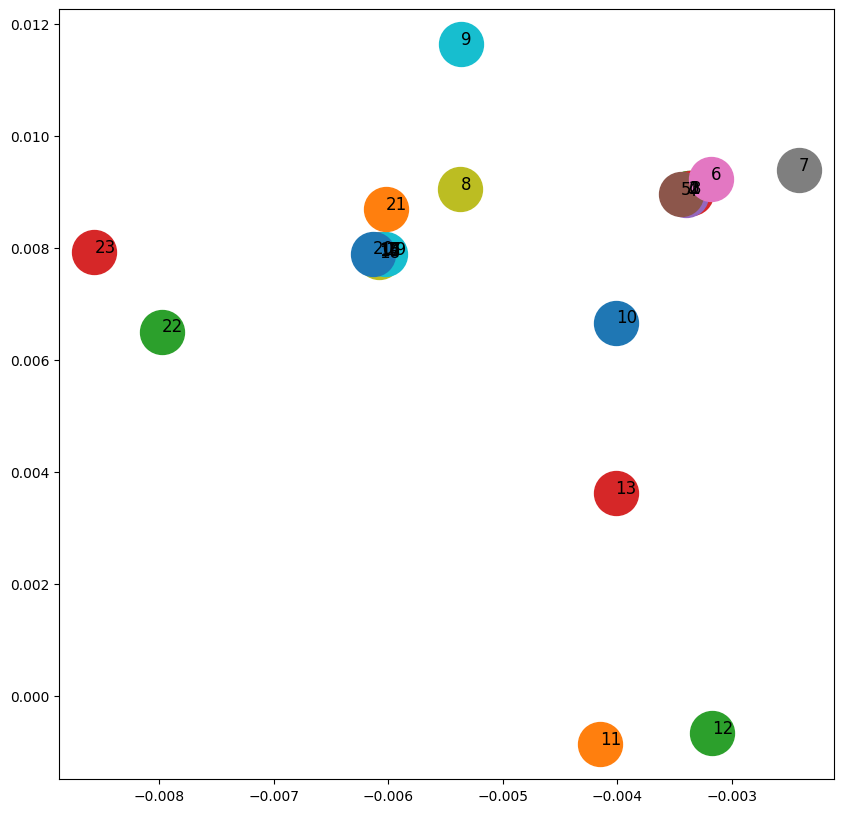

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

for x in G.nodes():

    v = gf.get_embedding()[x]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=12)

### GraphRep
- 전역 구조 정보를 통한 그래프 표현
- 임베딩이 대칭 속성을 갖지 않고도 고차 근접성을 유지할 수 있음

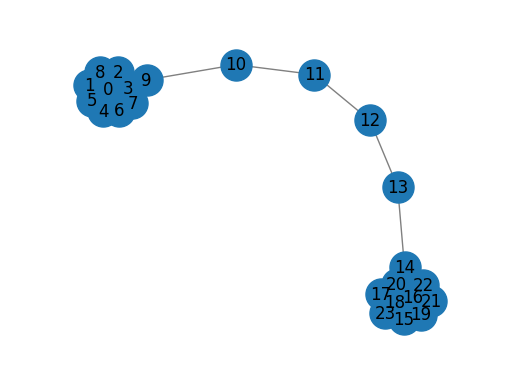

/usr/local/lib/python3.10/dist-packages/karateclub/node_embedding/neighbourhood/grarep.py:56: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(graph, nodelist=range(graph.number_of_nodes()))


In [ ]:
import networkx as nx
from karateclub.node_embedding.neighbourhood.grarep import GraRep

G = nx.barbell_graph(m1=10, m2=4)
draw_graph(G)

gr = GraRep(dimensions=2,order=3)
gr.fit(G)

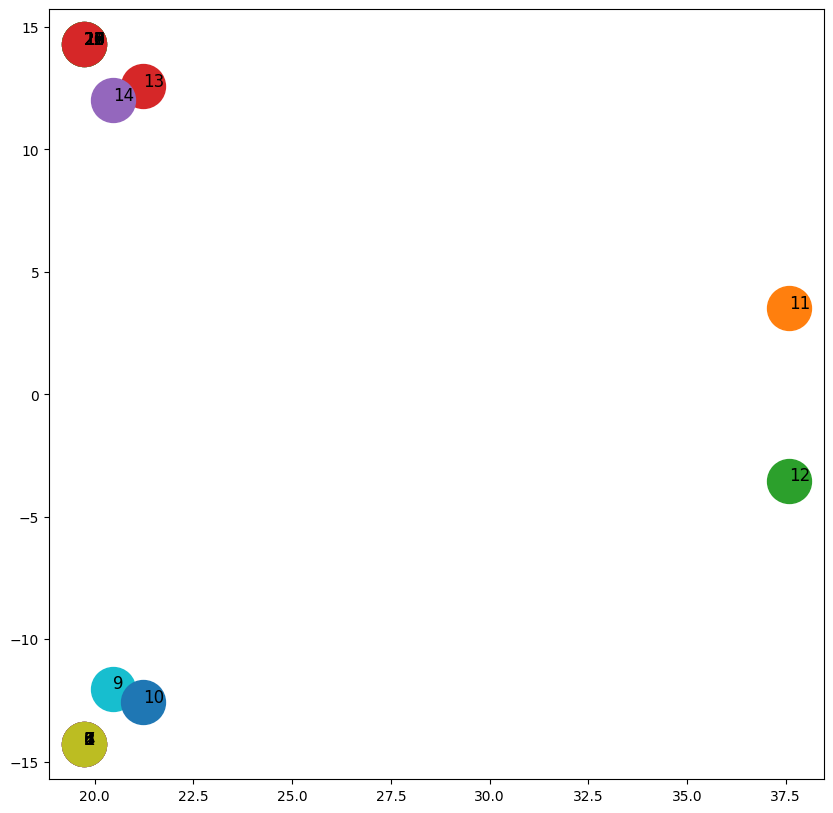

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

ida = 4
idb = 5
for x in G.nodes():

    v = gr.get_embedding()[x]
    ax.scatter(v[ida],v[idb], s=1000)
    ax.annotate(str(x), (v[ida],v[idb]), fontsize=12)

### HOPE

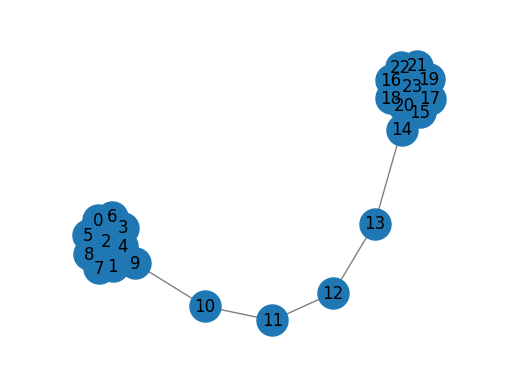

SVD error (low rank): 0.052092


array([[-0.07024409, -0.07024348, -0.07024409, -0.07024348],
       [-0.07024409, -0.07024348, -0.07024409, -0.07024348],
       [-0.07024409, -0.07024348, -0.07024409, -0.07024348],
       [-0.07024409, -0.07024348, -0.07024409, -0.07024348],
       [-0.07024409, -0.07024348, -0.07024409, -0.07024348],
       [-0.07024409, -0.07024348, -0.07024409, -0.07024348],
       [-0.07024409, -0.07024348, -0.07024409, -0.07024348],
       [-0.07024409, -0.07024348, -0.07024409, -0.07024348],
       [-0.07024409, -0.07024348, -0.07024409, -0.07024348],
       [-0.07104037, -0.07104201, -0.07104037, -0.07104201],
       [-0.00797181, -0.00799433, -0.00797181, -0.00799433],
       [-0.00079628, -0.00099787, -0.00079628, -0.00099787],
       [ 0.00079628, -0.00099787,  0.00079628, -0.00099787],
       [ 0.00797181, -0.00799433,  0.00797181, -0.00799433],
       [ 0.07104037, -0.07104201,  0.07104037, -0.07104201],
       [ 0.07024409, -0.07024348,  0.07024409, -0.07024348],
       [ 0.07024409, -0.

In [ ]:
import networkx as nx
from gem.embedding.hope import HOPE

G = nx.barbell_graph(m1=10, m2=4)
draw_graph(G)

hp = HOPE(d=4, beta=0.01)
hp.learn_embedding(G)

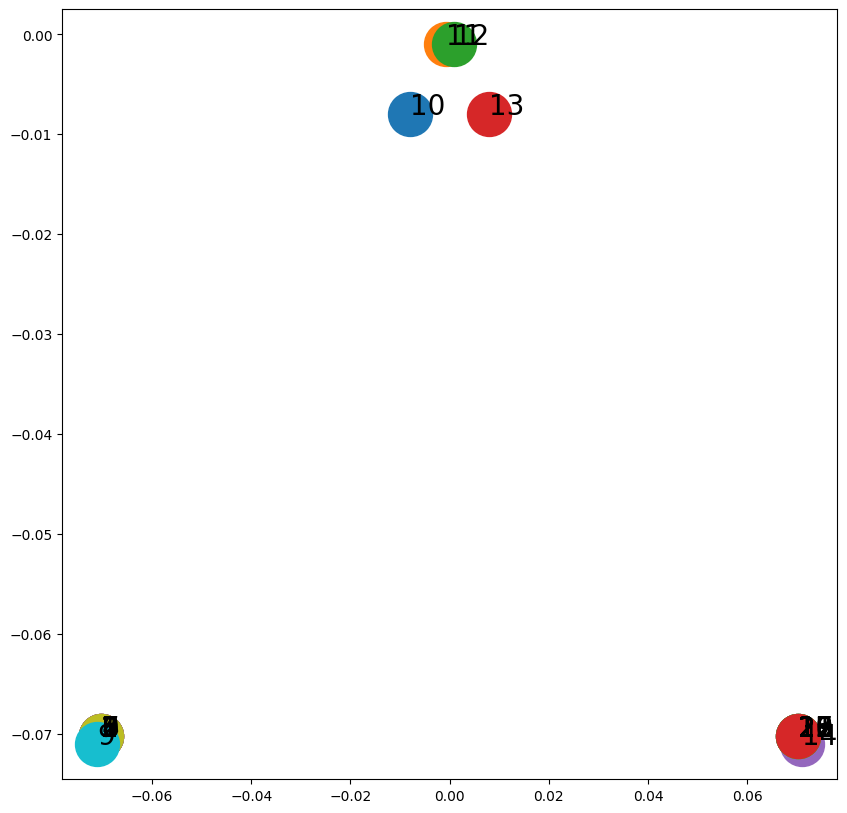

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

for x in G.nodes():

    v = hp.get_embedding()[x,2:]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=20)

### DeepWalk
- skip-gram모형을 통해서 주어진 그래프의 임베딩을 생성
- 랜덤워크의 응용
 - 각 노드에 최대 t크기의 랜덤 워크 생성
 - 이 랜덤 워크가 skip-gram 모형에 대한 입력
 - skip-gram을 통해 임베딩 발견
 - skip-gram: 단어 임베딩의 예, Context words로 target word를 모델링하는 방식

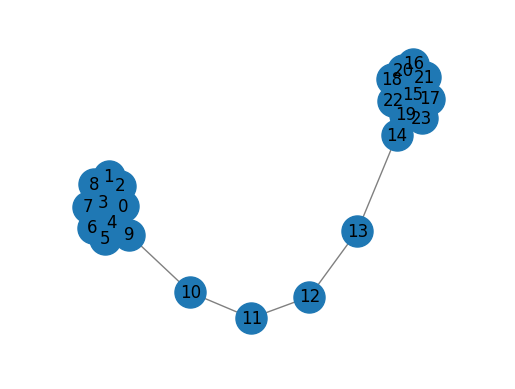

In [ ]:
import networkx as nx
from karateclub.node_embedding.neighbourhood.deepwalk import DeepWalk

G = nx.barbell_graph(m1=10, m2=4)
draw_graph(G)

dw = DeepWalk(dimensions=2)
dw.fit(G)

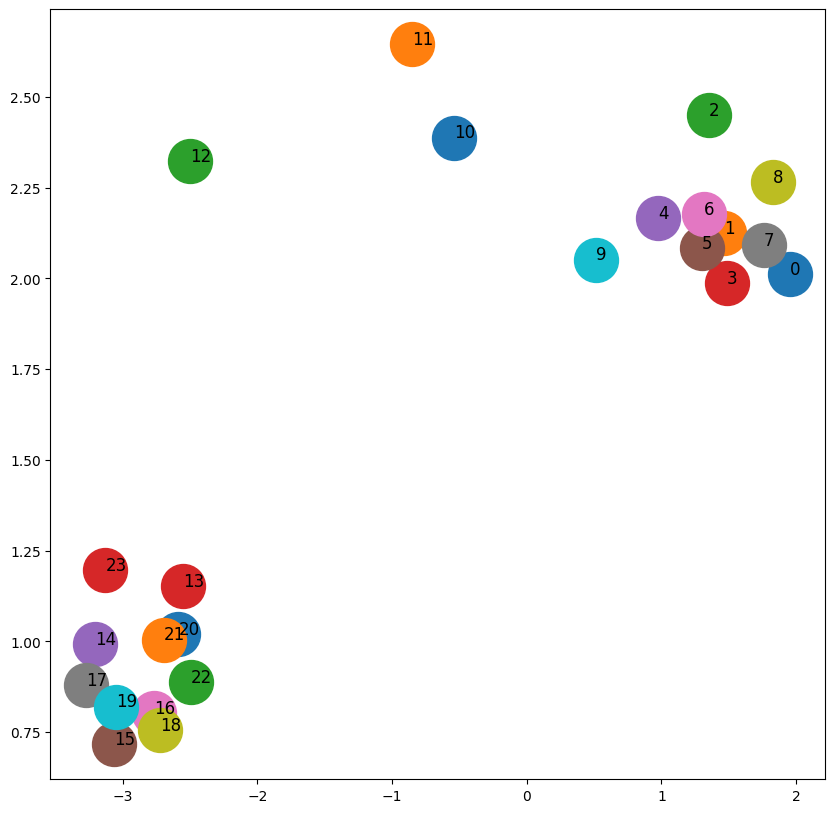

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

for x in G.nodes():

    v = dw.get_embedding()[x]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=12)

### Node2Vec
- Deep walk의 확장
- Deep walk 대비, 그래프에 편향된 랜덤 패스를 생성, 그래프의 지역 구조와 전역 커뮤니티 구조 보존

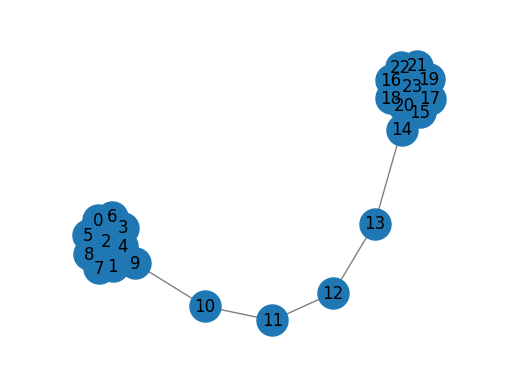

Computing transition probabilities:   0%|          | 0/24 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:00<00:00, 130.25it/s]


In [ ]:
import networkx as nx
from node2vec import Node2Vec

G = nx.barbell_graph(m1=10, m2=4)
draw_graph(G)

node2vec = Node2Vec(G, dimensions=2)
model = node2vec.fit(window=10)
embeddings = model.wv

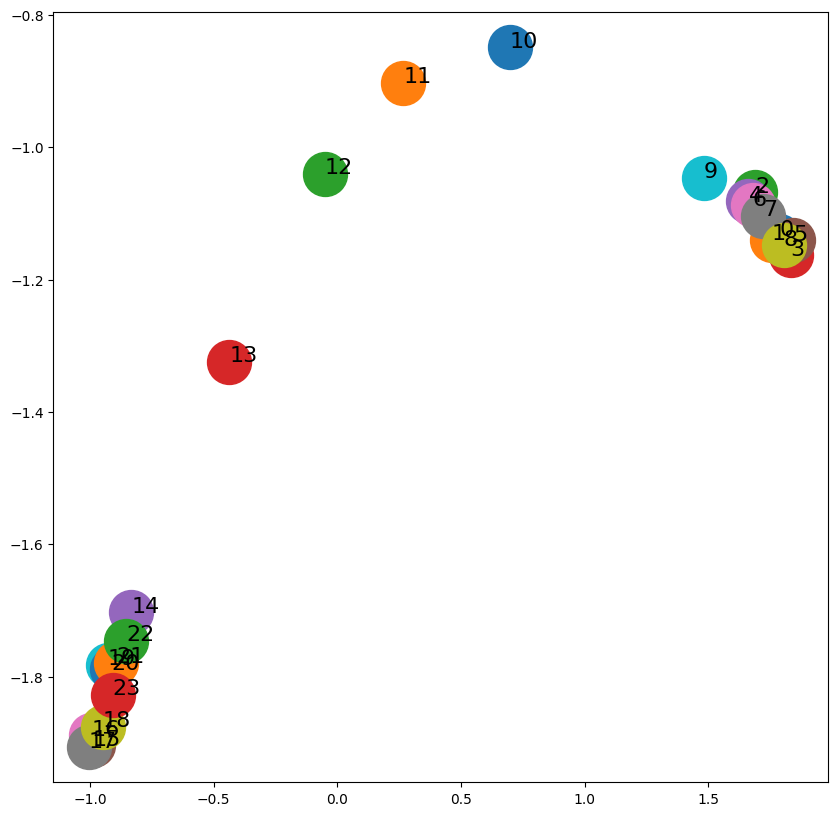

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

for x in G.nodes():

    v = model.wv[str(x)]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=16)

plt.show()

### Edge2Vec
- 엣지에 대한 임베딩!
- 인접한 두 노드의 노드 임베딩을 사용, 엣지의 임베딩을 추출
- 아다마르 임베딩 기법 사용

In [ ]:
from node2vec.edges import HadamardEmbedder
edges_embs = HadamardEmbedder(keyed_vectors=model.wv)

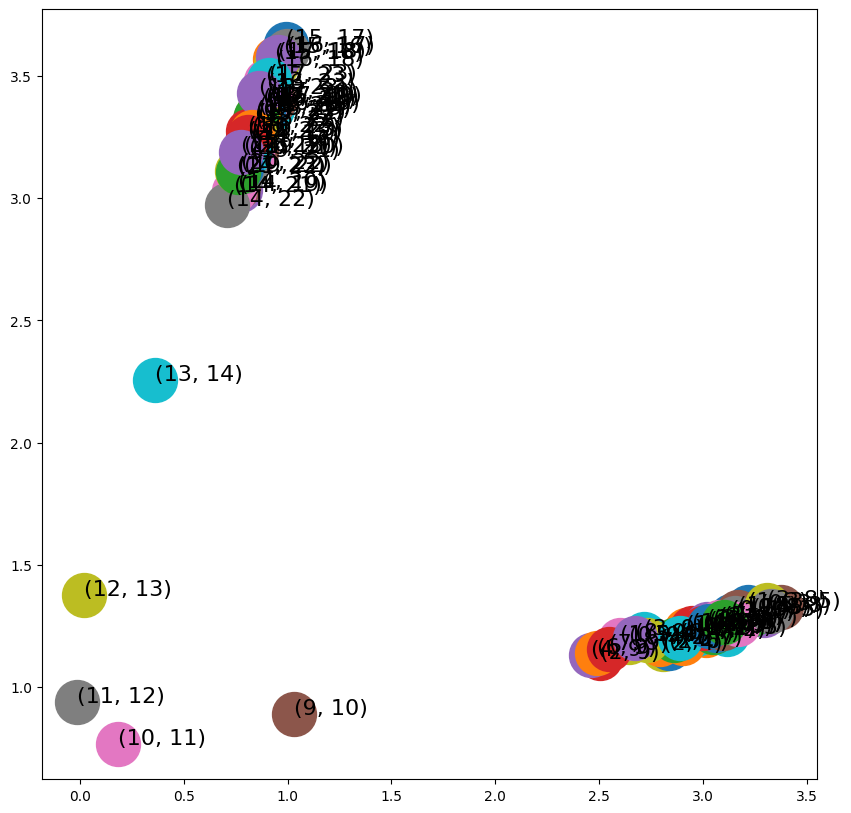

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))

for x in G.edges():

    v = edges_embs[(str(x[0]), str(x[1]))]
    ax.scatter(v[0],v[1], s=1000)
    ax.annotate(str(x), (v[0],v[1]), fontsize=16)

plt.show()

### Graph2Vec
- 주어진 그래프의 각 노드에 대한 임베딩
- 각 노드 및 노드가 속한 그래프를 같이 고려
- Doc2Vec의 응용
 - 전체 그래프가 Document의 역할
 - 각 노드의 자아 그래프로 생성된 하위 그래프를 Doc2Vec의 단어로 고려
 - 각 문서가 문장으로 구성되었듯이, 그래프가 하위 그래프로 구성된 구조를 고려함

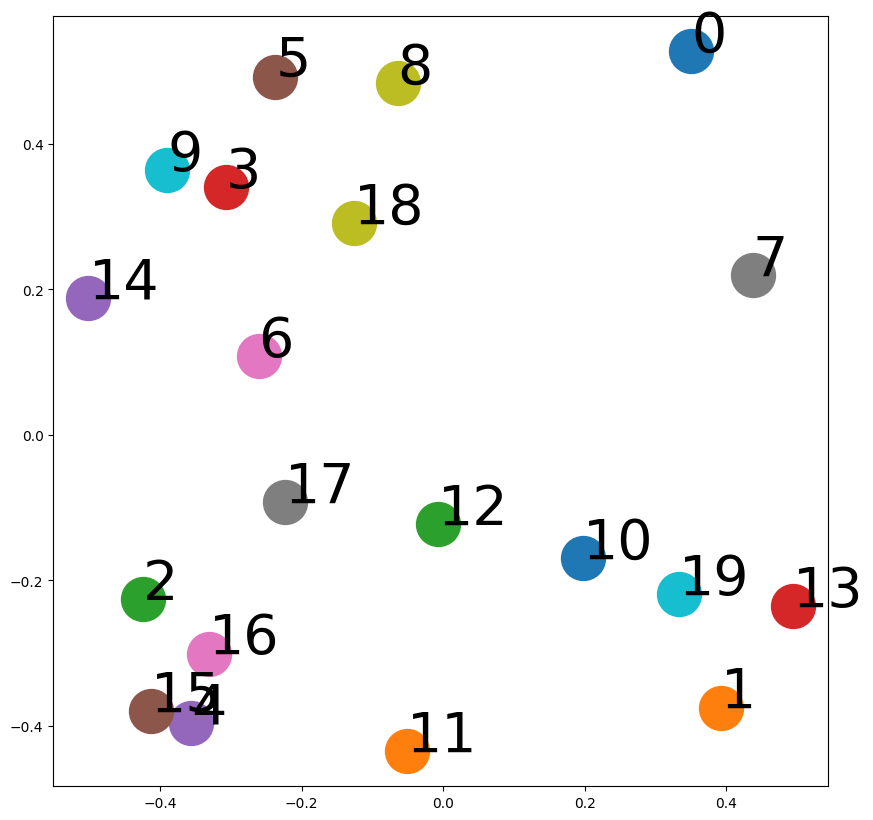

In [ ]:
import random
import matplotlib.pyplot as plt
from karateclub import Graph2Vec

n_graphs = 20

def generate_radom():
    n = random.randint(6, 20)
    k = random.randint(5, n)
    p = random.uniform(0, 1)
    return nx.watts_strogatz_graph(n,k,p), [n,k,p]

Gs = [generate_radom() for x in range(n_graphs)]

model = Graph2Vec(dimensions=2, wl_iterations=10)
model.fit([x[0] for x in Gs])
embeddings = model.get_embedding()

fig, ax = plt.subplots(figsize=(10,10))

for i,vec in enumerate(embeddings):

    ax.scatter(vec[0],vec[1], s=1000)
    ax.annotate(str(i), (vec[0],vec[1]), fontsize=40)

# 2. Link Prediction: 유사성 기반

## imilarity Based Methods

### 1) Index Based

### Resource Allocation

[(1, 2, 0.5), (2, 5, 0.5), (3, 4, 0.5)]


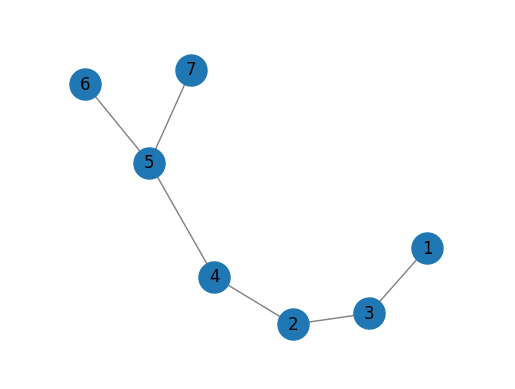

In [ ]:
import networkx as nx
edges = [[1,3],[2,3],[2,4],[4,5],[5,6],[5,7]]
G = nx.from_edgelist(edges)
preds = nx.resource_allocation_index(G,[(1,2),(2,5),(3,4)])
print(list(preds))
draw_graph(G)

### Jaccard Coefficient

[(1, 2, 0.5), (2, 5, 0.25), (3, 4, 0.3333333333333333)]


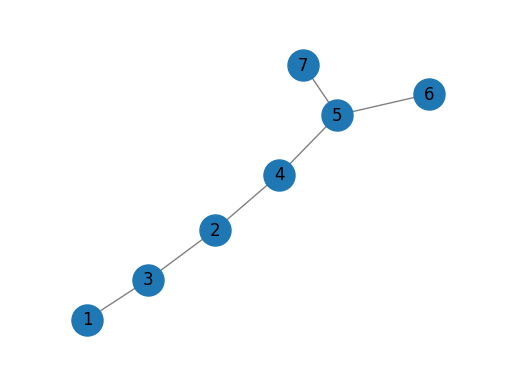

In [ ]:
import networkx as nx
edges = [[1,3],[2,3],[2,4],[4,5],[5,6],[5,7]]
G = nx.from_edgelist(edges)
preds = nx.jaccard_coefficient(G,[(1,2),(2,5),(3,4)])
print(list(preds))
draw_graph(G)

### 2) Community Based

### Community Common Neighbor

[(1, 2, 2), (2, 5, 1), (3, 4, 1)]


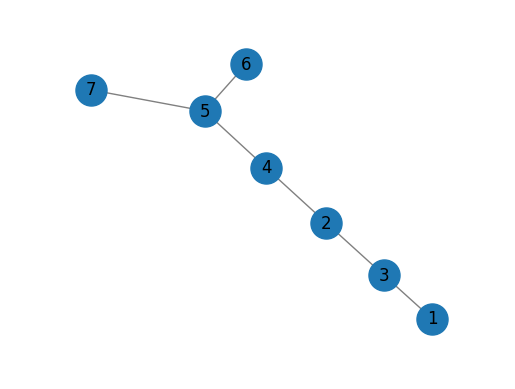

In [ ]:
import networkx as nx
edges = [[1,3],[2,3],[2,4],[4,5],[5,6],[5,7]]
G = nx.from_edgelist(edges)

G.nodes[1]["community"] = 0
G.nodes[2]["community"] = 0
G.nodes[3]["community"] = 0

G.nodes[4]["community"] = 1
G.nodes[5]["community"] = 1
G.nodes[6]["community"] = 1
G.nodes[7]["community"] = 1
preds = nx.cn_soundarajan_hopcroft(G,[(1,2),(2,5),(3,4)])
print(list(preds))
draw_graph(G)

### Community Common Neighbor

[(1, 2, 0.5), (2, 5, 0), (3, 4, 0)]


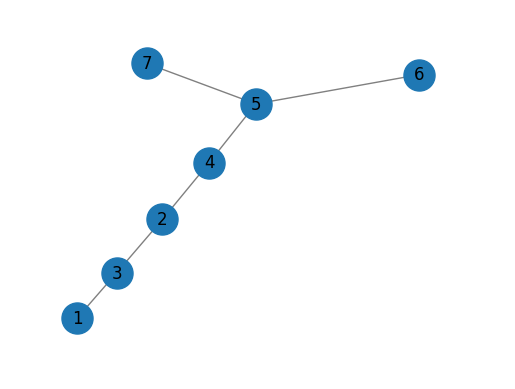

In [ ]:
import networkx as nx
edges = [[1,3],[2,3],[2,4],[4,5],[5,6],[5,7]]
G = nx.from_edgelist(edges)

G.nodes[1]["community"] = 0
G.nodes[2]["community"] = 0
G.nodes[3]["community"] = 0

G.nodes[4]["community"] = 1
G.nodes[5]["community"] = 1
G.nodes[6]["community"] = 1
G.nodes[7]["community"] = 1
preds = nx.ra_index_soundarajan_hopcroft(G,[(1,2),(2,5),(3,4)])
print(list(preds))
draw_graph(G)

### 3) Embedding based

- https://linqs-data.soe.ucsc.edu/public/lbc/cora.tgz
- https://temprl.com/cora.tgz

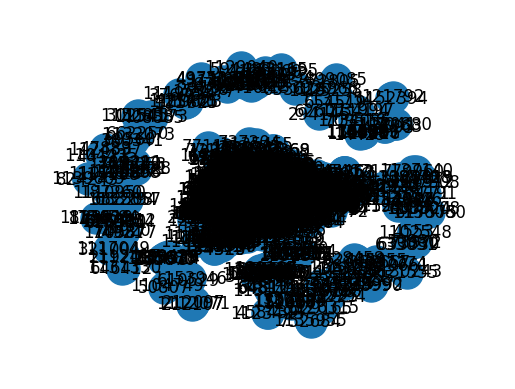

In [ ]:
import networkx as nx
import pandas as pd

edgelist = pd.read_csv("cora.cites", sep='\t', header=None, names=["target", "source"])
G = nx.from_pandas_edgelist(edgelist)
draw_graph(G)

In [ ]:
from node2vec import Node2Vec
from node2vec.edges import HadamardEmbedder

node2vec = Node2Vec(G)
model = node2vec.fit()
edges_embs = HadamardEmbedder(keyed_vectors=model.wv)


Computing transition probabilities:   0%|          | 0/2708 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 10/10 [00:09<00:00,  1.09it/s]


In [ ]:
embeddings = [edges_embs[str(x[0]),str(x[1])] for x in G.edges]

In [ ]:
papers = pd.read_csv("cora.content", sep="\t", header=None,
                     names=["paper_id"] + [f"term_{idx}" for idx in range(1433)] + ["subject"] )

In [ ]:
papers

,paper_id,term_0,term_1,term_2,term_3,term_4,term_5,term_6,term_7,term_8,...,term_1424,term_1425,term_1426,term_1427,term_1428,term_1429,term_1430,term_1431,term_1432,subject
0,31336,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Neural_Networks
1,1061127,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Rule_Learning
2,1106406,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
3,13195,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Reinforcement_Learning
4,37879,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2703,1128975,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
2704,1128977,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
2705,1128978,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
2706,117328,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Case_Based


In [ ]:
papers[papers.paper_id == 31336].subject.values

array(['Neural_Networks'], dtype=object)

In [ ]:
[G.get_edge_data(str(x[0]),str(x[1])) for x in G.edges]

labels = [  papers[ papers.paper_id == x[0]].subject.values == papers[ papers.paper_id == x[1]].subject.values for x in G.edges ]

In [ ]:
G.edges.data()

EdgeDataView([(1033, 35, {}), (1033, 1034, {}), (1033, 1107062, {}), (1033, 41714, {}), (1033, 45605, {}), (35, 103482, {}), (35, 103515, {}), (35, 1050679, {}), (35, 1103960, {}), (35, 1103985, {}), (35, 1109199, {}), (35, 1112911, {}), (35, 1113438, {}), (35, 1113831, {}), (35, 1114331, {}), (35, 1117476, {}), (35, 1119505, {}), (35, 1119708, {}), (35, 1120431, {}), (35, 1123756, {}), (35, 1125386, {}), (35, 1127430, {}), (35, 1127913, {}), (35, 1128204, {}), (35, 1128227, {}), (35, 1128314, {}), (35, 1128453, {}), (35, 1128945, {}), (35, 1128959, {}), (35, 1128985, {}), (35, 1129018, {}), (35, 1129027, {}), (35, 1129573, {}), (35, 1129683, {}), (35, 1129778, {}), (35, 1130847, {}), (35, 1130856, {}), (35, 1131116, {}), (35, 1131360, {}), (35, 1131557, {}), (35, 1131752, {}), (35, 1133196, {}), (35, 1133338, {}), (35, 1136814, {}), (35, 1137466, {}), (35, 1152421, {}), (35, 1152508, {}), (35, 1153065, {}), (35, 1153280, {}), (35, 1153577, {}), (35, 1153853, {}), (35, 1153943, {}), (3

In [ ]:
len(labels)
labels

[array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([False]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([False]),
 array([ True]),
 array([False]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([ True]),
 array([False]

In [ ]:
embeddings[0].shape
len(embeddings)

5278

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(embeddings, labels);

<ipython-input-85-c132125a5f30>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(embeddings, labels);


In [ ]:
from sklearn import metrics

y_pred = rf.predict(embeddings)

print('Precision:', metrics.precision_score(labels, y_pred))
print('Recall:', metrics.recall_score(labels, y_pred))
print('F1-Score:', metrics.f1_score(labels, y_pred))

Precision: 1.0
Recall: 1.0
F1-Score: 1.0


#3. 커뮤니티 발견

# Network Communities Detection

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import networkx as nx
G = nx.barbell_graph(m1=10, m2=4)

### Matrix Factorization

- 행렬 분해로 임베딩 발견 후 클러스터링으로 커뮤니티 발견

In [ ]:
from gem.embedding.hope import HOPE
gf = HOPE(d=4, beta=0.01)
gf.learn_embedding(G)
embeddings = gf.get_embedding()

SVD error (low rank): 0.052092


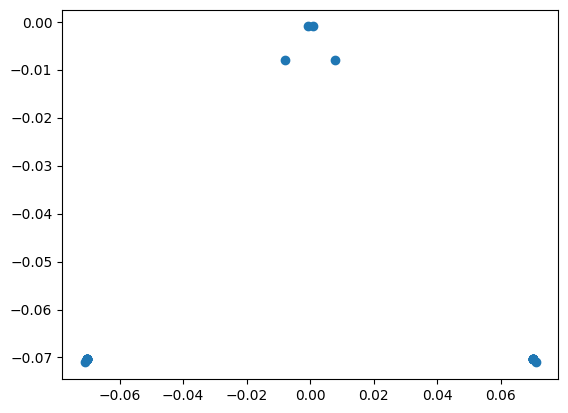

In [ ]:
plt.plot(embeddings[:, 0], embeddings[:, 1], 'o', linewidth=0)

- GaussianMixture model로 clustering

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
gm = GaussianMixture(n_components=3, random_state=0) #.(embeddings)

In [ ]:
labels = gm.fit_predict(embeddings)

In [ ]:
colors = ["blue", "green", "red"]

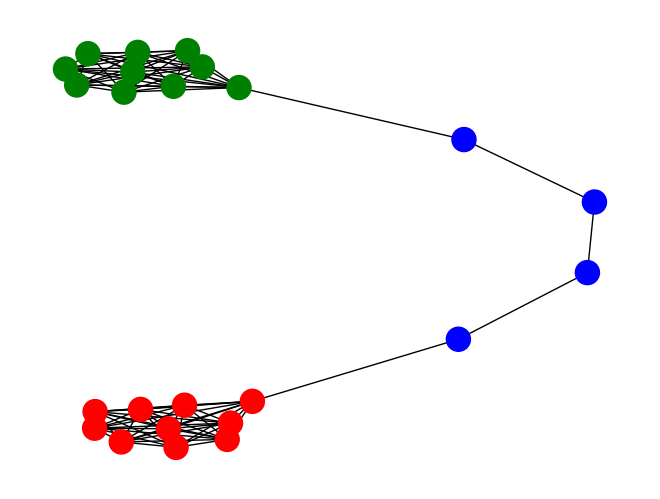

In [ ]:
nx.draw_spring(G, node_color=[colors[label] for label in labels])

### Spectral Clustering

- 인접행렬 기반의 spectral clustering 수행
- 이 기법은 mutually exclusive clustering이 아니어서 노드가 여러 커뮤니티에 속할 수 있음

In [ ]:
adj=np.array(nx.adjacency_matrix(G).todense())

<ipython-input-97-2edc90b4e2dc>:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj=np.array(nx.adjacency_matrix(G).todense())


In [ ]:
!pip install communities==2.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for communities: filename=communities-2.2.0-py3-none-any.whl size=10893 sha256=bb1e9f1443fba2b919d455a28dcb6bee06d0326d61e8fbef9aeba7f86bb42a7b
  Stored in directory: /root/.cache/pip/wheels/59/36/e6/46b627eba1447a8b4afda97000b146638d4377cced91e95986
Successfully built communities


In [ ]:
from communities.algorithms import spectral_clustering

communities = spectral_clustering(adj, k=3)

- 아래 그림에서 커뮤니티에 속한 노드는 붉은 색, 커뮤니티에 소속되지 않은 노드는 파란색

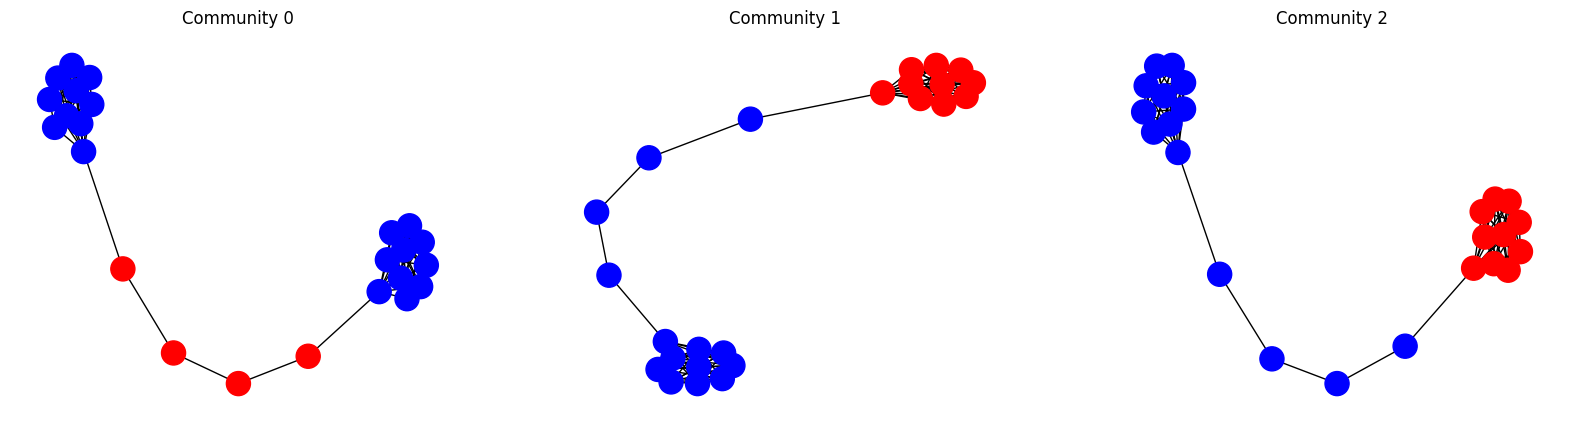

In [ ]:
plt.figure(figsize=(20, 5))

for ith, community in enumerate(communities):
    cols = ["red" if node in community else "blue" for node in G.nodes]
    plt.subplot(1,3,ith+1)
    plt.title(f"Community {ith}")
    nx.draw_spring(G, node_color=cols)

- 각 커뮤니티에 속한 노드 리스트

In [ ]:
communities

[{10, 11, 12, 13},
 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9},
 {14, 15, 16, 17, 18, 19, 20, 21, 22, 23}]

### Non Negative Matrix Factorization

- Non-Negative Matrix Factorization를 이용한 행렬 분해 이후 latent dimensions을 활용한 군집

In [ ]:
from sklearn.decomposition import NMF

In [ ]:
nmf = NMF(n_components=2)

In [ ]:
emb = nmf.fit_transform(adj)

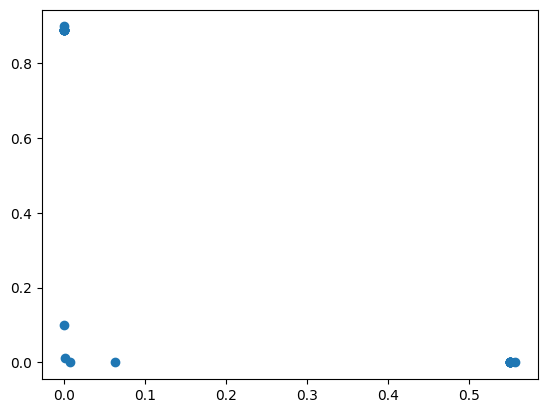

In [ ]:
plt.plot(emb[:, 0], emb[:, 1], 'o', linewidth=0)

- 임계치를 0.01로 지정한 경우의 커뮤니티 발견

In [ ]:
communities = [set(np.where(emb[:,ith]>0.01)[0]) for ith in range(2)]

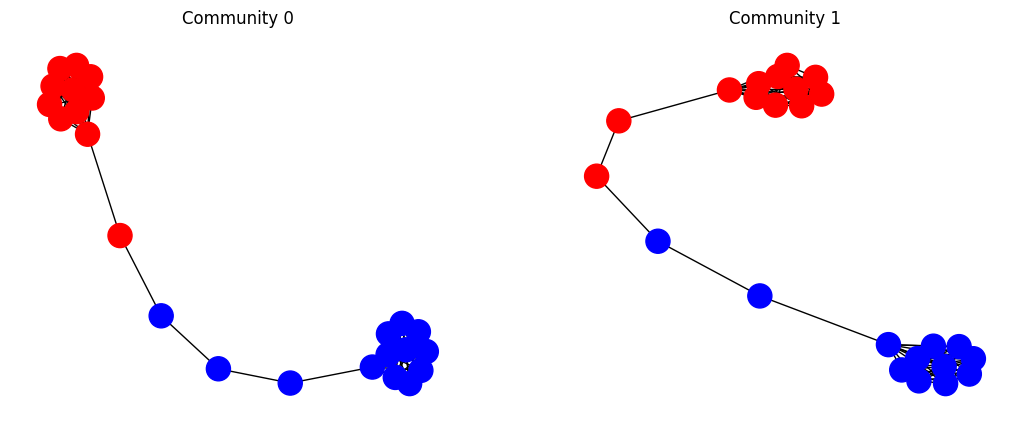

In [ ]:
plt.figure(figsize=(20, 5))

for ith, community in enumerate(communities):
    cols = ["red" if node in community else "blue" for node in G.nodes]
    plt.subplot(1,3,ith+1)
    plt.title(f"Community {ith}")
    nx.draw_spring(G, node_color=cols)

- 이 기법 역시 한 노드가 여러 커뮤니티 소속 가능

### Louvain and Modularity Optimization

- Louvain method: 커뮤니티 탐지에 많이 사용, 대용량 그래프에 적용
- Louvain method에서는 파티셔닝의 최적화를 수행
- mutually exclusing community detection algorithm
- modularity score 계산: 노드들이 같은 커뮤니티에 속하며, 각 커뮤니티들은 약하게 연결된 것을 파악)
- 커뮤니티의 수를 미리 지정할 필요 없음!

In [ ]:
from communities.algorithms import louvain_method
communities = louvain_method(adj)

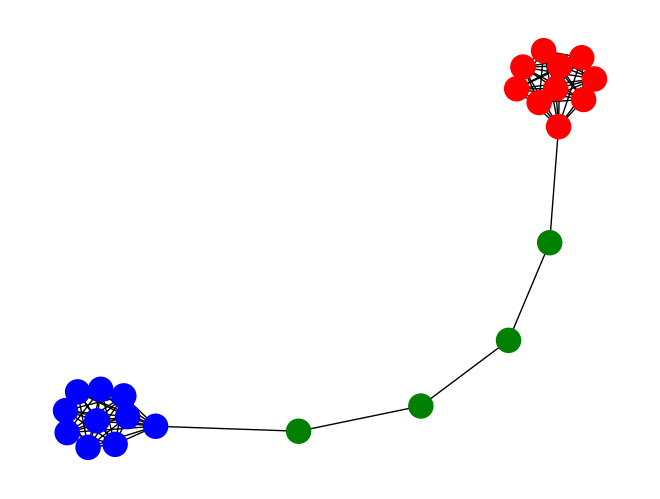

In [ ]:
c = pd.Series({node: colors[ith] for ith, nodes in enumerate(communities) for node in nodes}).values
nx.draw_spring(G, node_color=c)

In [ ]:
communities

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9},
 {10, 11, 12, 13},
 {14, 15, 16, 17, 18, 19, 20, 21, 22, 23}]

### Girvan Newman

- Girvan–Newman algorithm: 원 그래프에서 엣지를 제거해가며 커뮤니티 발견
-  “most valuable” edge를 찾아감: 높은 사이중앙성을 갖는 엣지 대상
- dendrogram으로도 표현
- 사이 중앙성을 사용하기 때문에 Large scale graph에는 부적절할 수 있음

In [ ]:
from communities.algorithms import girvan_newman
communities = girvan_newman(adj, n=2)

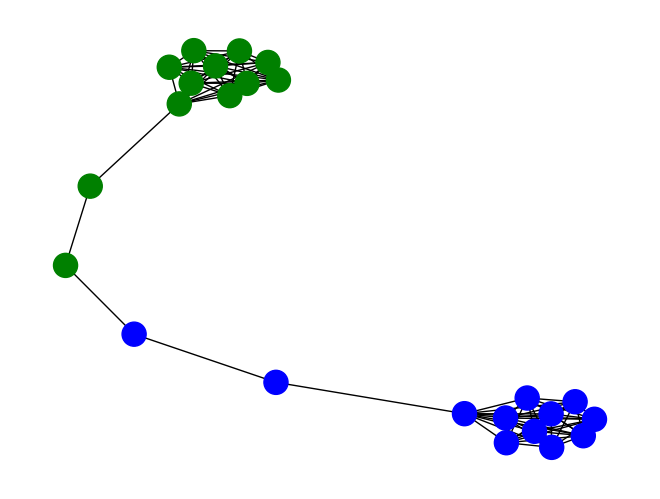

In [ ]:
c = pd.Series({node: colors[ith] for ith, nodes in enumerate(communities) for node in nodes}).values
nx.draw_spring(G, node_color=c)

In [ ]:
communities

[{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11},
 {12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23}]

# 4. 네트워크 데이터 저장소
http://networkrepository.com

- mtx 파일: : matrix market exchange format



In [ ]:
from scipy.io import mmread
adj_matrix = mmread("파일명.mtx")
graph = nx.from_scipy_sparse_matrix(adj_matrix)



FileNotFoundError: ignored

https://snap.stanford.edu/index.html

- edgelist를 txt로 제공

In [ ]:
g = nx.read_edgelist( "파일명.txt")
